# In this Notebook
- Demo of the ba_module to generate scale-free networks with barabasi-albert model
- Visualization of the degree distr. with cumulative function to avoid instability in the tail
- Visualization of the degree distr. of the intermediate states of the growing network

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import ba_module

# Usage of ba_module

In [62]:
m = 4  # degree of arriving nodes
N = 10**4  # number of timesteps to simulate
G = nx.complete_graph(4)  # input graph
edge_list = ba_module.generate_edgeList(G, m, N)
G.add_edges_from(edge_list)

# visualizing degree distribution

In [69]:
a = [d for v, d in G.degree]
k, counts = np.unique(np.array(a), return_counts=True)
cumulative_counts = np.cumsum(counts[::-1])[::-1]

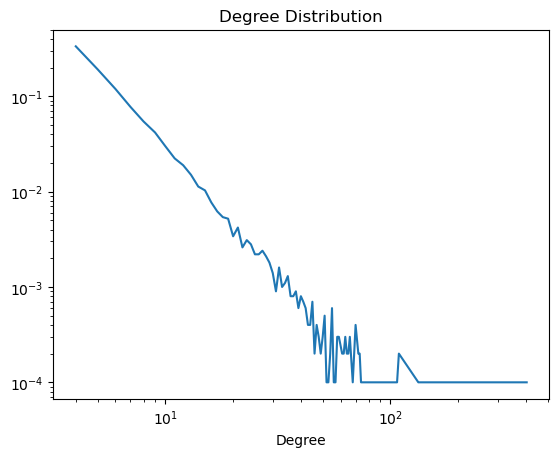

In [70]:
plt.plot(k, counts/counts.sum())
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.yscale('log')
plt.xscale('log')

The raw degree distribution is not a good way to analyze degrees in the tail due to scarsity of degrees. It is better to use the cumulative distribution function, as shown below. \
Note that if the degree distribution follows $k^{-\gamma}$, then the cumulative distribution function follows $k^{-\gamma + 1}$

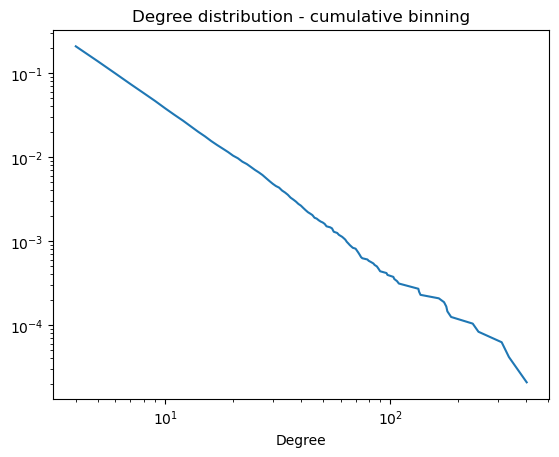

In [72]:
plt.plot(k, cumulative_counts/cumulative_counts.sum())
plt.title('Degree distribution - cumulative binning')
plt.xlabel('Degree')
plt.yscale('log')
plt.xscale('log')

# Intermediate states

In [88]:
m = 4
N = 10**4
G = nx.complete_graph(4)
edge_list, states = ba_module.generate_edgeList(G, m, N, intermediate_steps = [10**2, 10**3])

In [89]:
G_100 = G.copy()
G_100.add_edges_from(states[0])
G_1000 = G.copy()
G_1000.add_edges_from(states[1])
G_10000 = G.copy()
G_10000.add_edges_from(edge_list)

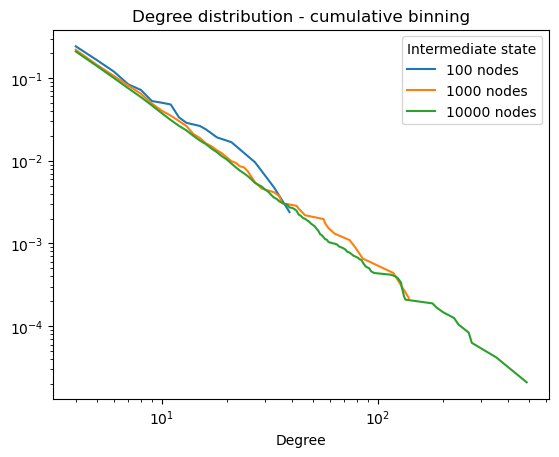

In [90]:
# G_100
k_100, counts_100 = np.unique(np.array([d for v, d in G_100.degree]), return_counts=True)
cumulative_counts_100 = np.cumsum(counts_100[::-1])[::-1]
plt.plot(k_100, cumulative_counts_100/cumulative_counts_100.sum(), label='100 nodes')

# G_1000
k_1000, counts_1000 = np.unique(np.array([d for v, d in G_1000.degree]), return_counts=True)
cumulative_counts_1000 = np.cumsum(counts_1000[::-1])[::-1]
plt.plot(k_1000, cumulative_counts_1000/cumulative_counts_1000.sum(), label='1000 nodes')

# G_10000
k_10000, counts_10000 = np.unique(np.array([d for v, d in G_10000.degree]), return_counts=True)
cumulative_counts_10000 = np.cumsum(counts_10000[::-1])[::-1]
plt.plot(k_10000, cumulative_counts_10000/cumulative_counts_10000.sum(), label='10000 nodes')

plt.title('Degree distribution - cumulative binning')
plt.xlabel('Degree')
plt.yscale('log')
plt.xscale('log')
plt.legend(title = "Intermediate state")

# Fit a power-law to the degree distributions

In [98]:
from scipy.optimize import curve_fit

In [99]:
def power_law(x, a, b):
    return a*np.power(x, b)

In [117]:
for k, c in zip([k_100, k_1000, k_10000], [counts_100, counts_1000, counts_10000]):
    pars, cov = curve_fit(f=power_law, xdata=k, ydata=c)
    print(f"{sum(c)} nodes network :\ta = {pars[0]:.0f}, gamma = {pars[1]:.2f}")

101 nodes network :	a = 950, gamma = -2.44
1001 nodes network :	a = 12995, gamma = -2.64
10004 nodes network :	a = 116247, gamma = -2.56
